# PyTorch Tutorial II: A Perceptron in PyTorch
implementing our Numpy model with PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.model_selection import train_test_split #for test set generation

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)
#y=y*2-1 #rescale to [-1,1]

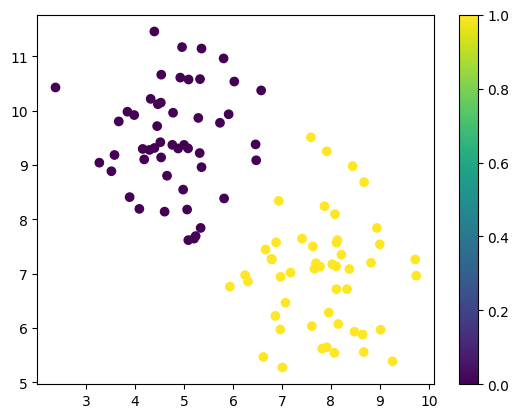

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Perceptron in PyTorch
* [PyTorch NN Module docu](https://pytorch.org/docs/stable/nn.html)

### define model

In [4]:
import torch
class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        self.non_linear = torch.nn.Sigmoid() #non-linear activation
    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation
        return output

### prepare training and test data

In [5]:
#make blob data
x, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

#split in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)



In [6]:
#have look
y_train

tensor([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

### get instance of model
and set optimizer

In [7]:
#get instance of perceptron model
model = Perceptron()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [8]:
#run test data theogh untrained model
model.eval() #set to eval mode
model(x_test)

tensor([[0.0463],
        [0.0235],
        [0.0227],
        [0.0221],
        [0.0372],
        [0.0418],
        [0.0310],
        [0.0328],
        [0.0377],
        [0.0311],
        [0.0384],
        [0.0299],
        [0.0189],
        [0.0206],
        [0.0307],
        [0.0200],
        [0.0325],
        [0.0211],
        [0.0259],
        [0.0440],
        [0.0317],
        [0.0394],
        [0.0273],
        [0.0296],
        [0.0254],
        [0.0375],
        [0.0218],
        [0.0202],
        [0.0347],
        [0.0173],
        [0.0529],
        [0.0235],
        [0.0296]], grad_fn=<SigmoidBackward0>)

### train

In [9]:
model.train() #set to train mode
epoch = 50
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()


Epoch 0: train loss: 1.79256272315979
Epoch 1: train loss: 1.5559617280960083
Epoch 2: train loss: 1.3382618427276611
Epoch 3: train loss: 1.1468826532363892
Epoch 4: train loss: 0.9886986017227173
Epoch 5: train loss: 0.8672898411750793
Epoch 6: train loss: 0.7808936834335327
Epoch 7: train loss: 0.7230344414710999
Epoch 8: train loss: 0.6854350566864014
Epoch 9: train loss: 0.6607719659805298
Epoch 10: train loss: 0.643805980682373
Epoch 11: train loss: 0.631242036819458
Epoch 12: train loss: 0.6211588382720947
Epoch 13: train loss: 0.6124835014343262
Epoch 14: train loss: 0.6046302914619446
Epoch 15: train loss: 0.597283124923706
Epoch 16: train loss: 0.5902714133262634
Epoch 17: train loss: 0.5835030674934387
Epoch 18: train loss: 0.5769276022911072
Epoch 19: train loss: 0.5705165863037109
Epoch 20: train loss: 0.564253568649292
Epoch 21: train loss: 0.5581281185150146
Epoch 22: train loss: 0.552133321762085
Epoch 23: train loss: 0.5462639927864075
Epoch 24: train loss: 0.540516078

### evaluate

In [13]:
model.eval() #set model to eval mode

#train
y_pred = model(x_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc =torch.sum(y_pred == y_train.int())/ y_train.shape[0]
print("train ACC: ",train_acc.float())

train ACC:  tensor(1.)


In [17]:
#test
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) / y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(0.9697)


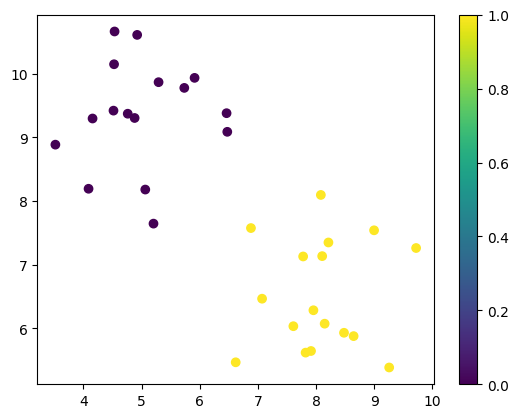

In [12]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.colorbar()